In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
url = "https://www.data.gouv.fr/fr/datasets/r/64e02cff-9e53-4cb2-adfd-5fcc88b2dc09"

In [4]:
df = pd.read_csv(url, sep=";")
df.head()

,id,cp,pop,adresse,ville,horaires,geom,prix_maj,prix_id,prix_valeur,...,epci_code,epci_name,dep_code,dep_name,reg_code,reg_name,com_code,com_name,services_service,horaires_automate_24_24
0,6110002,6110,R,Boulevard Carnot,Le Cannet,NaN,"43.571742369999996,7.016243639999999",2022-11-17T09:13:10+01:00,5.0,1.925,...,200039915.0,CA Cannes Pays de Lérins,06,Alpes-Maritimes,93.0,Provence-Alpes-Côte d'Azur,06030,Le Cannet,Toilettes publiques//Boutique alimentaire//Bou...,Non
1,85600002,85600,R,Route de cholet,Saint-Hilaire-de-Loulay,"{""@automate-24-24"": """", ""jour"": [{""@id"": ""1"", ...","46.979878899999996,-1.2992337729927",2022-11-19T11:09:17+01:00,5.0,1.625,...,200070233.0,CA Terres de Montaigu,85,Vendée,52.0,Pays de la Loire,85146,Montaigu-Vendée,Lavage manuel//Vente de gaz domestique (Butane...,Non
2,34220002,34220,R,12 Avenue de la gare,Saint-Pons-de-Thomières,"{""@automate-24-24"": """", ""jour"": [{""@id"": ""1"", ...","43.488,2.764",2022-10-01T18:59:57+02:00,3.0,0.740,...,200066348.0,CC du Minervois au Caroux,34,Hérault,76.0,Occitanie,34284,Saint-Pons-de-Thomières,Boutique alimentaire//Restauration à emporter/...,Non
3,13300008,13300,R,Boulevard Reine Jeanne,Salon-de-Provence,NaN,"43.634,5.091",2022-11-17T11:38:37+01:00,3.0,0.959,...,200054807.0,Métropole d'Aix-Marseille-Provence,13,Bouches-du-Rhône,93.0,Provence-Alpes-Côte d'Azur,13103,Salon-de-Provence,Vente de fioul domestique//Lavage manuel//Vent...,Non
4,20220002,20220,R,"29, Ave Pdt Paul Doumer",L'ÎLE-ROUSSE,"{""@automate-24-24"": ""1"", ""jour"": [{""@id"": ""1"",...","42.632,8.945",2022-11-16T09:57:16+01:00,2.0,1.879,...,200073104.0,CC de l'Île-Rousse - Balagne,2B,Haute-Corse,94.0,Corse,2B134,L'Île-Rousse,Laverie//Relais colis//Boutique alimentaire//B...,Oui


In [5]:
sp95 = df.query("prix_nom == 'SP95'")
sp95["lat"] = sp95["geom"].apply(lambda x: float(x.split(",")[0]))
sp95["lon"] = sp95["geom"].apply(lambda x: float(x.split(",")[1]))
sp95.head()

D:\tdubot\AppData\Local\Temp\ipykernel_19180\754668107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp95["lat"] = sp95["geom"].apply(lambda x: float(x.split(",")[0]))
D:\tdubot\AppData\Local\Temp\ipykernel_19180\754668107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp95["lon"] = sp95["geom"].apply(lambda x: float(x.split(",")[1]))


,id,cp,pop,adresse,ville,horaires,geom,prix_maj,prix_id,prix_valeur,...,dep_code,dep_name,reg_code,reg_name,com_code,com_name,services_service,horaires_automate_24_24,lat,lon
4,20220002,20220,R,"29, Ave Pdt Paul Doumer",L'ÎLE-ROUSSE,"{""@automate-24-24"": ""1"", ""jour"": [{""@id"": ""1"",...","42.632,8.945",2022-11-16T09:57:16+01:00,2.0,1.879,...,2B,Haute-Corse,94.0,Corse,2B134,L'Île-Rousse,Laverie//Relais colis//Boutique alimentaire//B...,Oui,42.632000,8.945000
8,23300006,23300,R,Avenue Jean Jaures,La Souterraine,"{""@automate-24-24"": """", ""jour"": [{""@id"": ""1"", ...","46.2376795,1.4793062",2022-11-19T07:25:00+01:00,2.0,1.739,...,23,Creuse,75.0,Nouvelle-Aquitaine,23176,La Souterraine,Laverie//Vente de fioul domestique//Vente de p...,Non,46.237679,1.479306
14,31190002,31190,R,RN20,AUTERIVE,NaN,"43.348381304200004,1.47203766924",2022-11-17T07:29:30+01:00,2.0,1.825,...,31,Haute-Garonne,76.0,Occitanie,31033,Auterive,"Vente de gaz domestique (Butane, Propane)//DAB...",Non,43.348381,1.472038
40,76600001,76600,R,"35, rue de la Vallée",LE HAVRE,"{""@automate-24-24"": ""1"", ""jour"": [{""@id"": ""1"",...","49.495,0.155",2022-11-18T09:28:45+01:00,2.0,1.779,...,76,Seine-Maritime,28.0,Normandie,76351,Le Havre,Station de gonflage//Piste poids lourds//Lavag...,Oui,49.495000,0.155000
42,34620002,34620,R,43 avenue de béziers,Puisserguier,NaN,"43.36678,3.04868",2022-11-16T20:35:25+01:00,2.0,1.855,...,34,Hérault,76.0,Occitanie,34225,Puisserguier,Vente de fioul domestique//Station de gonflage...,Non,43.366780,3.048680


In [6]:
gdf = gpd.GeoDataFrame(
    sp95, geometry=gpd.points_from_xy(sp95["lon"], sp95["lat"]), crs="epsg:4326"
)
gdf.head()

,id,cp,pop,adresse,ville,horaires,geom,prix_maj,prix_id,prix_valeur,...,dep_name,reg_code,reg_name,com_code,com_name,services_service,horaires_automate_24_24,lat,lon,geometry
4,20220002,20220,R,"29, Ave Pdt Paul Doumer",L'ÎLE-ROUSSE,"{""@automate-24-24"": ""1"", ""jour"": [{""@id"": ""1"",...","42.632,8.945",2022-11-16T09:57:16+01:00,2.0,1.879,...,Haute-Corse,94.0,Corse,2B134,L'Île-Rousse,Laverie//Relais colis//Boutique alimentaire//B...,Oui,42.632000,8.945000,POINT (8.94500 42.63200)
8,23300006,23300,R,Avenue Jean Jaures,La Souterraine,"{""@automate-24-24"": """", ""jour"": [{""@id"": ""1"", ...","46.2376795,1.4793062",2022-11-19T07:25:00+01:00,2.0,1.739,...,Creuse,75.0,Nouvelle-Aquitaine,23176,La Souterraine,Laverie//Vente de fioul domestique//Vente de p...,Non,46.237679,1.479306,POINT (1.47931 46.23768)
14,31190002,31190,R,RN20,AUTERIVE,NaN,"43.348381304200004,1.47203766924",2022-11-17T07:29:30+01:00,2.0,1.825,...,Haute-Garonne,76.0,Occitanie,31033,Auterive,"Vente de gaz domestique (Butane, Propane)//DAB...",Non,43.348381,1.472038,POINT (1.47204 43.34838)
40,76600001,76600,R,"35, rue de la Vallée",LE HAVRE,"{""@automate-24-24"": ""1"", ""jour"": [{""@id"": ""1"",...","49.495,0.155",2022-11-18T09:28:45+01:00,2.0,1.779,...,Seine-Maritime,28.0,Normandie,76351,Le Havre,Station de gonflage//Piste poids lourds//Lavag...,Oui,49.495000,0.155000,POINT (0.15500 49.49500)
42,34620002,34620,R,43 avenue de béziers,Puisserguier,NaN,"43.36678,3.04868",2022-11-16T20:35:25+01:00,2.0,1.855,...,Hérault,76.0,Occitanie,34225,Puisserguier,Vente de fioul domestique//Station de gonflage...,Non,43.366780,3.048680,POINT (3.04868 43.36678)


<AxesSubplot:>

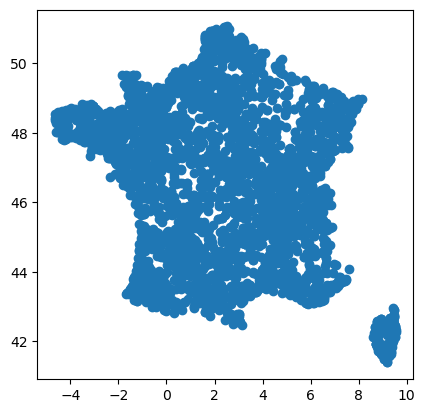

In [7]:
gdf.plot()

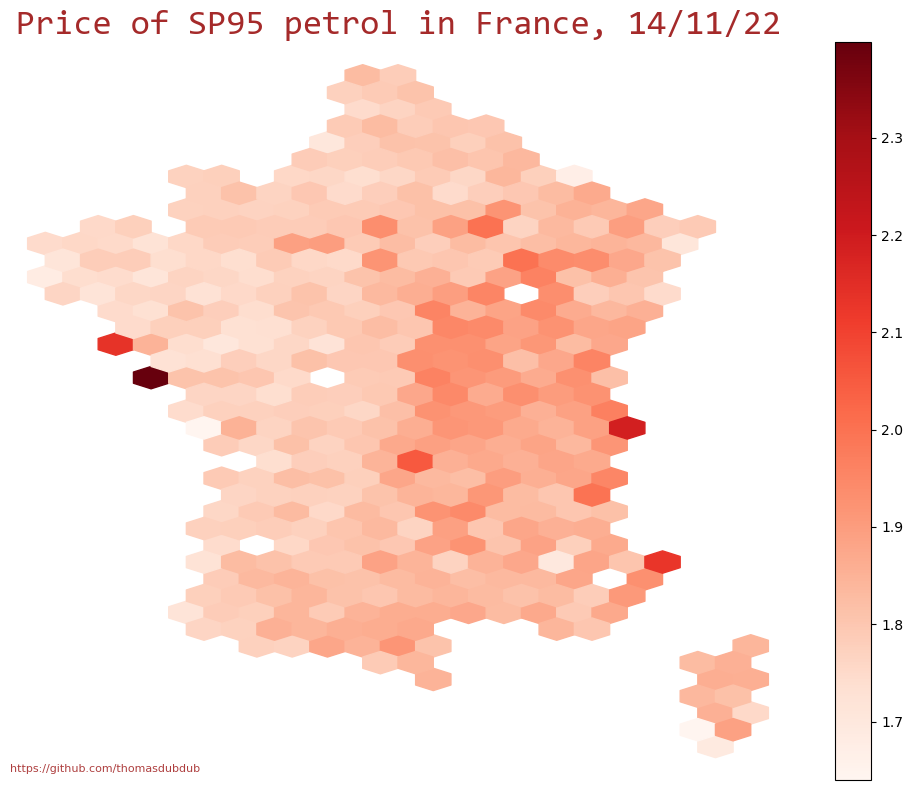

In [8]:
f, ax = plt.subplots(figsize=(10, 8))
gdf.plot(
    ax=ax,
    kind="hexbin",
    x="lon",
    y="lat",
    C="prix_valeur",
    gridsize=(20, 20),
    cmap="Reds",
)

plt.title(
    "Price of SP95 petrol in France, 14/11/22",
    fontsize=25,
    fontname="Consolas",
    color="brown",
    y=1.0,
)

plt.title(
    "https://github.com/thomasdubdub",
    fontsize=8,
    color="brown",
    alpha=0.9,
    y=0.0,
    loc="left",
)
ax.axis("off")
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.tight_layout()
plt.savefig("sp95.png", dpi=150, bbox_inches="tight", pad_inches=0)